In [1]:
# 数据无量纲化

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
import numpy as np
X = np.array(data)

In [2]:
X

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [9]:
(X - X.min(axis = 0))/(X.max(axis = 0) - X.min(axis = 0))

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [10]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X)
mms.transform(X)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [12]:
# 标准化
(X - X.mean(axis = 0))/X.std(axis = 0)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X)
std.transform(X)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [19]:
# 先归一，再标准
# StandardScaler().fit_transform(MinMaxScaler().fit_transform(X))
# MinMaxScaler().fit_transform(StandardScaler().fit_transform(X))

In [21]:
# 1.生成100个随机数
# 2.绘制这100个数的直方图
# 3.对数据进行标准化处理
# 4.再次绘制标准化处理过后的直方图

import matplotlib.pyplot as plt 

(array([11.,  6.,  9., 12.,  7., 13., 12., 10., 10., 10.]),
 array([0.00217928, 0.10191439, 0.20164949, 0.3013846 , 0.4011197 ,
        0.50085481, 0.60058991, 0.70032502, 0.80006012, 0.89979523,
        0.99953033]),
 <a list of 10 Patch objects>)

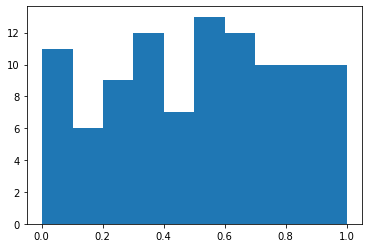

In [28]:
# 查看分布

a = np.random.rand(100)
plt.hist(a)

(array([11.,  6.,  9., 12.,  7., 13., 12., 10., 10., 10.]),
 array([-1.7902438 , -1.44302961, -1.09581542, -0.74860123, -0.40138704,
        -0.05417285,  0.29304134,  0.64025552,  0.98746971,  1.3346839 ,
         1.68189809]),
 <a list of 10 Patch objects>)

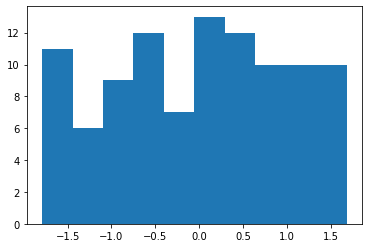

In [29]:
# 做完标准化之后查看分布

std = StandardScaler().fit(a.reshape(-1,1))
stda = std.transform(a.reshape(-1,1))
plt.hist(stda)

(array([11.,  6.,  9., 12.,  7., 13., 12., 10., 10., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

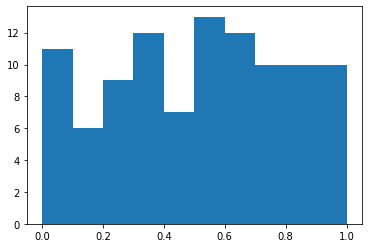

In [30]:
# 做归一化之后，分布式是否变化
mms = MinMaxScaler().fit(a.reshape(-1,1))
mmsa = mms.transform(a.reshape(-1,1))
plt.hist(mmsa)

In [26]:
# 缺失值的处理
import numpy as np
import pandas as pd
data = pd.read_csv("Narrativedata.csv")
data

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No
...,...,...,...,...
886,27.0,male,S,No
887,19.0,female,S,Yes
888,NaN,female,S,No
889,26.0,male,C,Unknown


In [27]:
#查看缺失值
#data.info()

#Tips:缺失值比例
data.isna().mean()

Age         0.198653
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [28]:
# 有的列里面虽然是没有np.nan,但是很可能当前缺失值是以字符串的形式存在数据里面
# 单独将这一列拿出来，做一个value_counts的动作
data['Survived'].value_counts()

No         486
Yes        310
Unknown     95
Name: Survived, dtype: int64

In [29]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
# 加入数据集当中有多个连续特征需要进行空缺值填补，可以select_dtypes的形式，一并将这些特征全部筛选出来
# 当前筛选出来的特数据已经是一个二维数组。可以直接放入于sklearn的preprocessing包里面去
# data['Age2'] = 3

# con_features = data.select_dtypes(['float', 'int'])
# SimpleImputer(strategy = 'median').fit_transform(con_features)

In [31]:
# 使用SimpleImputer
from sklearn.impute import SimpleImputer

# 使用中位数填补Age
Age = data['Age'].values.reshape(-1, 1)      # 0329期，李勣，可以使用mat. T的方法加入SimpleImputer
imp_median = SimpleImputer(strategy = 'median').fit(Age)
data['Age'] = imp_median.transform(Age)

# 如果想用常数来填补空缺值的话，策略参数为constant,并且和fill_value一起使用，指定想填补常数
# SimpleImputer(strategy = 'constant', fill_value = 0)     #fillna(0)

# 使用众数填补Embarked
Embarked = data['Embarked'].values.reshape(-1,1)
imp_freq = SimpleImputer(strategy = 'most_frequent').fit(Embarked)
data['Embarked'] = imp_freq.transform(Embarked)

# 对Y值进行空缺值填补
Survived = data['Survived'].values.reshape(-1, 1)
imp_s = SimpleImputer(missing_values = 'Unknown', strategy = 'most_frequent').fit(Survived)
data['Survived'] = imp_s.transform(Survived)

In [32]:
# 编码与哑变量

# preprocessing.LabelEncoder：标签专用，能够将分类转换为分类数值
from sklearn.preprocessing import LabelEncoder
y = data['Survived']     # 不必要进行reshape,转换二维数组的形式
le = LabelEncoder().fit(y)
data['Survived'] = le.transform(y)

In [33]:
# 想写出一种代码，自动化的判断当前这个一列下面的离散的类别，自动生成replace可以用到的做编码的字典，从而对任意一个数据，都可以自动化的完成编码的操作
# d = data['Sex'].value_counts()
# data['Sex'].replace(pd.Series(range(len(d)), index = d.index))

In [34]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [35]:
# preprocessing.OrdinalEncoder：特征专用，能够将离散特征转换为分类数值
from sklearn.preprocessing import OrdinalEncoder

data_ = data[['Sex', 'Embarked']]
data_

oe = OrdinalEncoder().fit(data_)
sex_embarked = oe.transform(data_)

# 0301期张传鹏， 使用pd.factorize
#data_.apply(lambda col : pd.factorize(col)[0], axis = 0)

sex_embarked

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [36]:
# 如何知道转换之后，每一个编码它代表的是原来什么值
oe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [41]:
# preprocessing.OneHotEncoder：独热编码，创建哑变量
data_ = data[['Sex', 'Embarked']]

from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder().fit(data_)
one_hot_results = onehot.transform(data_).toarray()

In [44]:
onehot.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [42]:
one_hot_results

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [48]:
np.append(*features + onehot.categories_)

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

In [49]:
# 尝试将features给提取出来
features = np.array(['Sex', 'Embarked'])

# 尝试在features里面每个元素的后面加上_,用于区分
features = np.array([i + '_' for i in features])

# 尝试将categories_提取出来准备做新数据的列名
one_hot_features = np.array(onehot.categories_)

# 使用feaures + one_hot_features借助numpy广播的形式来将Sex_后面加上其所有的类别，Embarked_后面加上其所有的类别
nest_features = features + one_hot_features

# 使用np.append(*nest_features)将数据集里所有的元素全部追加在一起形成干净的colnames
colnames = np.append(*nest_features)

In [78]:
# 将onehot_result做成dataframe，并且添加上这个是正确的原始的列名
one_hot_df = pd.DataFrame(one_hot_results, columns = colnames)

# 用pd.concat进行拼接
data_new = pd.concat([data, one_hot_df], axis = 1)

In [79]:
data_new.columns

Index(['Age', 'Sex', 'Embarked', 'Survived', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [80]:
# 将当前的data中列名里的标签给pop出来，用lable变量接住
data_new = data_new.drop(['Sex', 'Embarked'], axis = 1)

# 使用pandas的reindex的方式来按col_name重新排序列名
data_new = data_new.reindex(['Age', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived'], axis = 1)
data_new.head()

,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,0.0,1.0,0.0,0.0,1.0,0
1,38.0,1.0,0.0,1.0,0.0,0.0,1
2,26.0,1.0,0.0,0.0,0.0,1.0,1
3,35.0,1.0,0.0,0.0,0.0,1.0,1
4,35.0,0.0,1.0,0.0,0.0,1.0,0


In [62]:
#from sklearn.impute import KNNImputer
#from missingpy import KNNImputer, MissForest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
X = data_new.iloc[:, :-1]
Y = data_new.iloc[:, -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3)
rfc = RandomForestClassifier(n_estimators = 100).fit(Xtrain, Ytrain)
#rfc.score(Xtrain, Ytrain), rfc.score(Xtest, Ytest)
cross_val_score(rfc, X, Y, cv = 10).mean()

0.7273033707865169

In [87]:
# 处理连续型特征：二值化与分段
# sklearn.preprocessing.Binarizer：根据阈值将数据二值化，特征专用

# 首先提取出当前的age这一列，一般做预处理，如果只是对一列进行转换的话，需要做reshape的动作，将一个维数据转换成竖着的形式的二维数据

from sklearn.preprocessing import Binarizer
# 实例化并且转换
Age = data['Age'].values.reshape(-1, 1)
bin_age = Binarizer(threshold = 30).fit(Age)
binary_age = bin_age.transform(Age)

In [102]:
# preprocessing.KBinsDiscretizer：将连续变量划分为离散变量
from sklearn.preprocessing import KBinsDiscretizer
kb_age = KBinsDiscretizer(n_bins = 4, encode = 'onehot', strategy = 'uniform').fit(Age)
kb_age.transform(Age).toarray()
#

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [101]:
# a = np.array([1,3,3,3,3,3,4,6,10]).reshape(-1,1)

#KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans').fit_transform(a)

In [213]:
# 特征选择
import pandas as pd
import numpy as np
data = pd.read_csv('digit recognizor.csv')

X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
print(data.shape)


# filter过滤法¶

# 方差过滤
from sklearn.feature_selection import VarianceThreshold
VTS = VarianceThreshold(threshold = X.var().median()).fit(X)
X_fsvar = VTS.transform(X)

X_fsvar.shape

# 将特征减少一半


# get_support

(42000, 785)


(42000, 392)

In [120]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(k = 5)
# cross_val_score(knn, X_fsvar, Y, cv = 5).mean()

In [123]:
# 没有做方差过滤之前的交叉验证的分数
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
cross_val_score(rfc, X, Y, cv = 5).mean()

0.9374523809523809

In [125]:
# 没有做方差过滤之前的交叉验证的分数
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
cross_val_score(rfc, X_fsvar, Y, cv = 5).mean()

0.9394047619047619

In [128]:
# 因为3中随机:
# 1. 在bootstrap,进行了有放回的随机采样，想象成对数据集做行的随机提取，这样子的话就形成了n个采样集
# 2. 对于每一个采样集来说，又进行了列的随机的提取, 很可能只提取了10几个特征
# 3. 每一个完成的采样集来说，我们使用树模型拟合数据的过程当中，会通过randomsate来树随机性

In [133]:
# 相关性过滤
# 尝试去找每一个特征和标签之间的相关，如果非常相关的话，我就保留，因为可以这个特征来对Y做预测

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif



# 卡方检验
X_fschi = SelectKBest(chi2, k = 300).fit_transform(X, Y)
X_fschi.shape

# 假设在这里，已知需要300个特征

# 验证模型效果，使用随机森林

rfc = RandomForestClassifier(n_estimators = 10)
cross_val_score(rfc, X_fschi, Y, cv = 5).mean()

0.9339761904761904

In [142]:
# F检验
X_fsf = SelectKBest(f_classif, k = 300).fit_transform(X, Y)
rfc = RandomForestClassifier(n_estimators = 10)
cross_val_score(rfc, X_fsf, Y, cv = 5).mean()

/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 139 140 141 168 196 392 420 421 448 476 532 560 644 645
 671 672 673 699 700 701 727 728 729 730 731 754 755 756 757 758 759 760
 780 781 782 783] are constant.
  UserWarning)
/Users/xiangyangni/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.9367857142857142

In [18]:
# # 互信息法
# X_fmif= SelectKBest(mutual_info_classif, k = 300).fit_transform(X, Y)
# rfc = RandomForestClassifier(n_estimators = 10)
# cross_val_score(rfc, X_fmif, Y, cv = 5).mean()

In [153]:
# Embedded潜入法
from sklearn.feature_selection import SelectFromModel
rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)

X_embeded = SelectFromModel(rfc, threshold = 0.005).fit_transform(X, Y)
X_embeded.shape

cross_val_score(rfc, X_embeded, Y, cv = 5).mean()

In [170]:
# 包装法

from sklearn.feature_selection import RFE
rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)
selector = RFE(rfc, n_features_to_select = 340, step = 50).fit(X, Y)
X_wrapper = selector.transform(X)
# .ranking_

In [169]:
pd.Series(selector.ranking_).value_counts().sort_index()

1     340
2      44
3      50
4      50
5      50
6      50
7      50
8      50
9      50
10     50
dtype: int64

In [173]:
cross_val_score(rfc, X_wrapper, Y, cv = 5).mean()

0.9397142857142857

In [21]:
# 降维方法



In [161]:
a = np.mat([[1, 4],
            [4, 100]])
a

matrix([[  1,   4],
        [  4, 100]])

In [162]:
np.linalg.eig(a)[0]

array([  0.83864682, 100.16135318])

In [163]:
np.linalg.eig(a)[1]

matrix([[-0.9991874 , -0.04030552],
        [ 0.04030552, -0.9991874 ]])

In [164]:
a = np.mat([[1, 0.4],
            [0.4, 1]])
a

matrix([[1. , 0.4],
        [0.4, 1. ]])

In [165]:
np.linalg.eig(a)[0]

array([1.4, 0.6])

In [166]:
np.linalg.eig(a)[1]

matrix([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]])

In [192]:
# 我们首先拿到一个数据集，算出它的协方差矩阵
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = pd.DataFrame(iris['data'])

# 首先不做标准化处理

In [196]:
# 大致的观测一下X
X.head(3)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [198]:
# 尝试看一下PCA的结果, 不设置n_components, 想通过新的特征贡献比，选择应该选多少的特征出来
pca = PCA().fit(X)

# 给PCAA的特征值
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [200]:
pca.explained_variance_

# 这个给出的是每一个新的特征的方差，其实就是特征值
# 上面给出的结果，每一列都一个特征向量。当前的这个结果是特征值，一个特征值对应一个特征向量
# 特征值，特征向量，成对出现

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [189]:
# 重点是查看当前新的特征的一个方差比，pca.explained_variance_ / pca.explained_variance_.sum()
# 可以通过这个ratio来尝试决定应该选取多少个特征出来
pca.explained_variance_ratio_

# 通过数字比较出，当前从新的特征当中选择出最好的2个即可

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

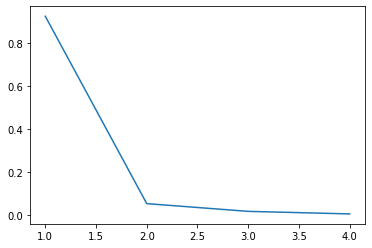

In [205]:
import matplotlib.pyplot as plt
plt.plot(range(1,5), pca.explained_variance_ratio_)


In [207]:
# 当前我们确定了选择的特征的个数的时候，就可以来设置n_component
pca = PCA(n_components = 2).fit(X)

# 最后数据就出来了
X_final = pca.transform(X)


In [209]:
# 如果做标准化的化
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

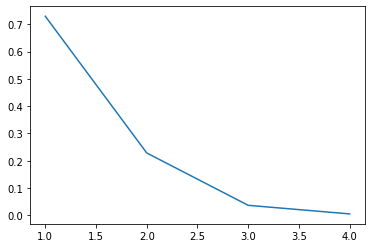

In [210]:
# 做了标准化之后，确定n_componets应该等于3
import matplotlib.pyplot as plt
plt.plot(range(1,5), pca.explained_variance_ratio_)

In [211]:
pca = PCA(n_components = 3).fit(X_std)
X_final = pca.transform(X_std)

In [212]:
# pca = PCA(n_components = 'mle')

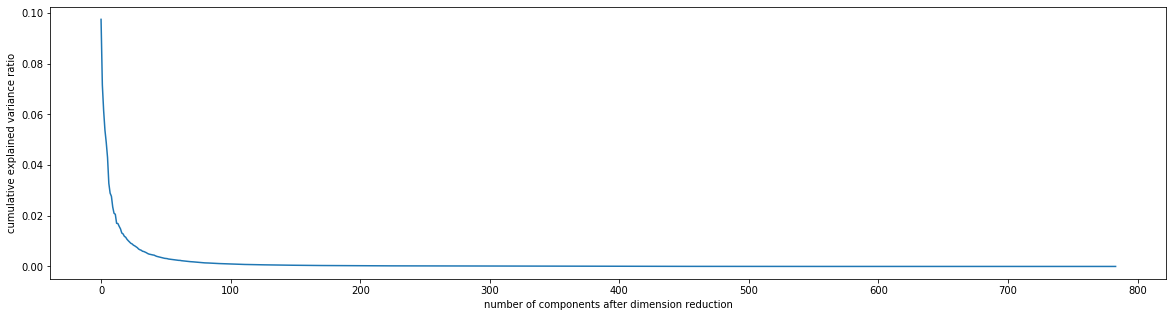

In [216]:
# PCA对手写数据集的降维
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(pca_line.explained_variance_ratio_)
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [217]:
# 从图中看出，最好的50个特征他们方差的占比，非常的大，后面的特征，方差的占比会非常的小
# n_components可以尝试选50

pca = PCA(n_components = 50).fit(X)
X_pca_50 = pca.transform(X)
cross_val_score(rfc, X_pca_50, Y, cv = 5).mean()

0.9125

In [32]:
#画累计方差贡献率曲线，找最佳降维后维度的范围


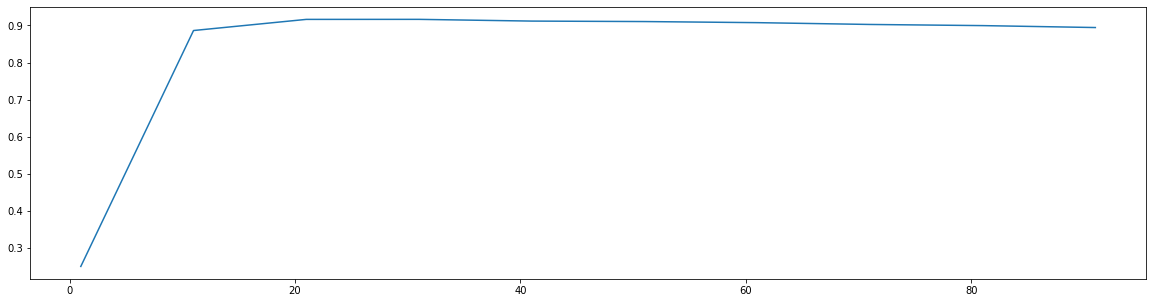

In [44]:
#降维后维度的学习曲线，继续缩小最佳维度的范围
#======【TIME WARNING：2mins 30s】======#

score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

In [221]:
#导入找出的最佳维度进行降维，查看模型效果
X_dr = PCA(23).fit_transform(X)

#======【TIME WARNING:1mins 30s】======#
cross_val_score(RandomForestClassifier(n_estimators=100,random_state=0),X_dr,Y,cv=5).mean()

0.9460714285714287

In [218]:
1 - 23 / 785

0.9707006369426752